In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
#Basic imports
import numpy as np
import pandas as pd

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import warnings
warnings.simplefilter('ignore')

df = pd.read_csv("/content/drive/MyDrive/heart.csv")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score

# 1. Normalize the data using Min-max scaler

In [ ]:
#oldpeak to int
df['oldpeak'] = df['oldpeak'].astype(int) 
#categorical to object
df['sex'] = df['sex'].astype(float) 
df['cp'] = df['cp'].astype(object) 
df['fbs'] = df['fbs'].astype(float) 
df['restecg'] = df['restecg'].astype(object) 
df['exang'] = df['exang'].astype(float) 
df['slope'] = df['slope'].astype(object) 
df['ca'] = df['ca'].astype(object) 
df['thal'] = df['thal'].astype(object) 
df['target'] = df['target'].astype(float) 

In [ ]:
#normalize numerical features
from sklearn.preprocessing import MinMaxScaler

df_norm = df.copy()
scaler = MinMaxScaler()
#scaler.fit(data)
df_norm[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(df_norm[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

In [ ]:
df_norm.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0,0.292453,0.196347,0.0,1,0.740458,0.0,0.166667,2,2,3,0.0
1,0.500000,1.0,0,0.433962,0.175799,1.0,0,0.641221,1.0,0.500000,0,0,3,0.0
2,0.854167,1.0,0,0.481132,0.109589,0.0,1,0.412214,1.0,0.333333,0,0,3,0.0


# 2. Transform categorical to normal features using One-hot Encoding

In [ ]:
#We use pandas's 'get_dummies()' method for hot-encoding
df_norm = pd.get_dummies(df_norm, columns = ['cp', 'restecg', 'slope', 'ca', 'thal'])

In [ ]:
df_norm.head(3)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.479167,1.0,0.292453,0.196347,0.0,0.740458,0.0,0.166667,0.0,1,...,1,0,0,1,0,0,0,0,0,1
1,0.500000,1.0,0.433962,0.175799,1.0,0.641221,1.0,0.500000,0.0,1,...,0,1,0,0,0,0,0,0,0,1
2,0.854167,1.0,0.481132,0.109589,0.0,0.412214,1.0,0.333333,0.0,1,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   float64
 1   sex        1025 non-null   float64
 2   trestbps   1025 non-null   float64
 3   chol       1025 non-null   float64
 4   fbs        1025 non-null   float64
 5   thalach    1025 non-null   float64
 6   exang      1025 non-null   float64
 7   oldpeak    1025 non-null   float64
 8   target     1025 non-null   float64
 9   cp_0       1025 non-null   uint8  
 10  cp_1       1025 non-null   uint8  
 11  cp_2       1025 non-null   uint8  
 12  cp_3       1025 non-null   uint8  
 13  restecg_0  1025 non-null   uint8  
 14  restecg_1  1025 non-null   uint8  
 15  restecg_2  1025 non-null   uint8  
 16  slope_0    1025 non-null   uint8  
 17  slope_1    1025 non-null   uint8  
 18  slope_2    1025 non-null   uint8  
 19  ca_0       1025 non-null   uint8  
 20  ca_1    

# 3. Checking for Imbalances 

In [ ]:
# Checking for imbalanced data based on outcome.
df_norm['target'].value_counts()

1.0    526
0.0    499
Name: target, dtype: int64

# 4. Creating Imbalance

In [ ]:
#delete the first 400 rows where target = 1
df_norm = df_norm.sort_values(by ='target')
#df_norm.head(50)
df_norm = df_norm.iloc[400:]
#print(df_norm)
df_norm['target'].value_counts()

1.0    526
0.0     99
Name: target, dtype: int64

In [ ]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 220 to 172
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        625 non-null    float64
 1   sex        625 non-null    float64
 2   trestbps   625 non-null    float64
 3   chol       625 non-null    float64
 4   fbs        625 non-null    float64
 5   thalach    625 non-null    float64
 6   exang      625 non-null    float64
 7   oldpeak    625 non-null    float64
 8   target     625 non-null    float64
 9   cp_0       625 non-null    uint8  
 10  cp_1       625 non-null    uint8  
 11  cp_2       625 non-null    uint8  
 12  cp_3       625 non-null    uint8  
 13  restecg_0  625 non-null    uint8  
 14  restecg_1  625 non-null    uint8  
 15  restecg_2  625 non-null    uint8  
 16  slope_0    625 non-null    uint8  
 17  slope_1    625 non-null    uint8  
 18  slope_2    625 non-null    uint8  
 19  ca_0       625 non-null    uint8  
 20  ca_1    

# 5. Splitting train & test data

In [ ]:
X = df_norm.iloc[:, df_norm.columns != 'target'].values 
y = df_norm['target'].values
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=4)

# 6. KNN

Text(0, 0.5, 'Mean Error')

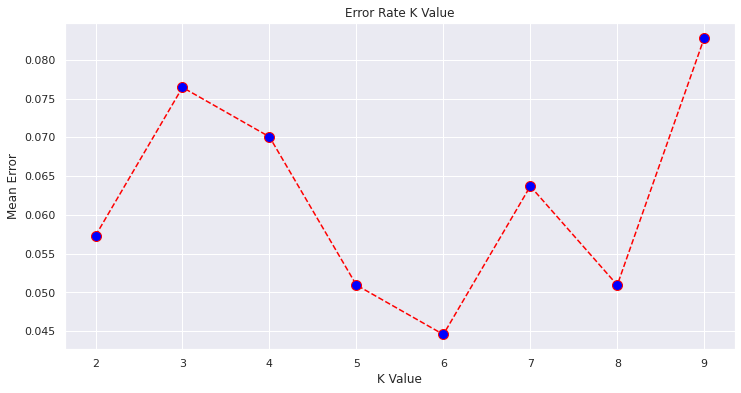

In [ ]:
error = []
# Calculating error for K values between 1 and 10
for i in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(2, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=6)  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test) 


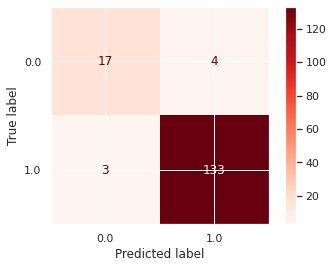

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix  

confusion_matrix(y_test, y_pred)
disp = plot_confusion_matrix(classifier, X_test, y_test, cmap='Reds')
plt.show()

In [ ]:
print("Recall score: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

#print(classification_report(y_test, y_pred))

Recall score: 0.9779411764705882
F1 Score: 0.9743589743589743


# 7. SVM

In [ ]:
# Creating SVM model.
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

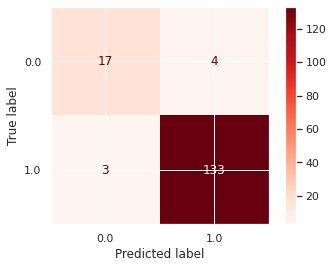

In [ ]:
disp = plot_confusion_matrix(clf, X_test, y_test, cmap='Reds')

In [ ]:
print("Recall score: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

Recall score: 0.9779411764705882
F1 Score: 0.9743589743589743


# 8. Oversampling 

In [ ]:
# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

## 8.1 ROS

In [ ]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))

[(0.0, 390), (1.0, 390)]


### KNN

Text(0, 0.5, 'Mean Error')

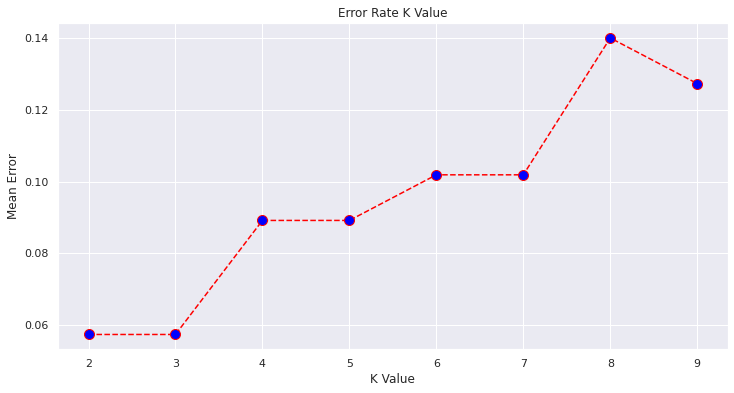

In [ ]:
error = []
# Calculating error for K values between 1 and 10
for i in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_ros, y_train_ros)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(2, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train_ros, y_train_ros)
y_pred= classifier.predict(X_test) 

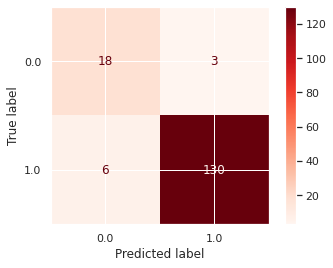

In [ ]:
disp = plot_confusion_matrix(classifier, X_test, y_test, cmap='Reds')

In [ ]:
print("Recall score: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

Recall score: 0.9558823529411765
F1 Score: 0.966542750929368


### SVM

In [ ]:
# Creating SVM model.
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_ros,y_train_ros)
y_pred = clf.predict(X_test)

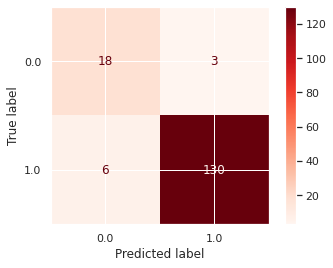

In [ ]:
disp = plot_confusion_matrix(classifier, X_test, y_test, cmap='Reds')

In [ ]:
print("Recall score: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

Recall score: 0.9779411764705882
F1 Score: 0.981549815498155


## 8.2 SMOTE

Instead of randomly oversampling with replacement, SMOTE takes each minority sample and introduces synthetic data points connecting the minority sample and its nearest neighbors. Neighbors from the k nearest neighbors are chosen randomly.

In [ ]:
# Randomly over sample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_smote).items()))

[(0.0, 390), (1.0, 390)]


### KNN

Text(0, 0.5, 'Mean Error')

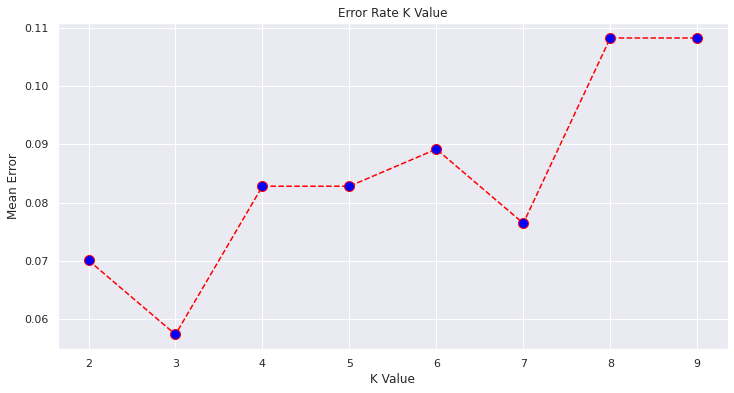

In [ ]:
error = []
# Calculating error for K values between 1 and 10
for i in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_smote, y_train_smote)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(2, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train_smote, y_train_smote)
y_pred= classifier.predict(X_test) 

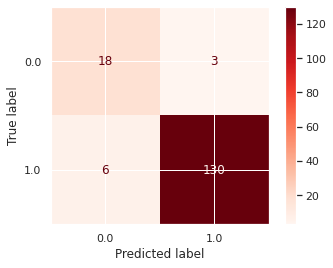

In [ ]:
disp = plot_confusion_matrix(classifier, X_test, y_test, cmap='Reds')

In [ ]:
print("Recall score: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

Recall score: 0.9558823529411765
F1 Score: 0.966542750929368


### SVM

In [ ]:
# Creating SVM model.
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_smote,y_train_smote)
y_pred = clf.predict(X_test)

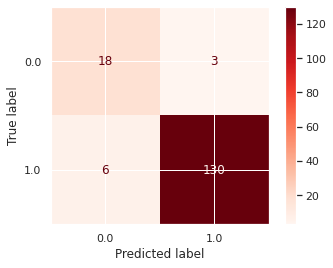

In [ ]:
disp = plot_confusion_matrix(classifier, X_test, y_test, cmap='Reds')

In [ ]:
print("Recall score: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

Recall score: 0.9779411764705882
F1 Score: 0.981549815498155


# 9. Random Undersampling

## 9.1 RUS

In [ ]:
# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)
# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

[(0.0, 78), (1.0, 78)]


### KNN

Text(0, 0.5, 'Mean Error')

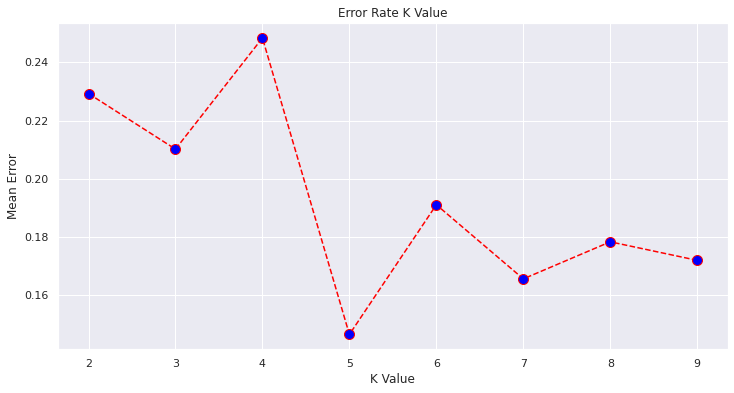

In [ ]:
error = []
# Calculating error for K values between 1 and 10
for i in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_rus, y_train_rus)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(2, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train_rus, y_train_rus)
y_pred= classifier.predict(X_test) 

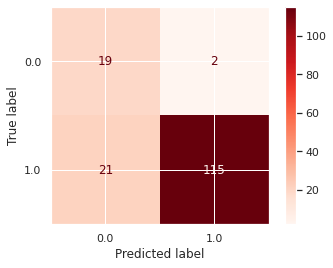

In [ ]:
disp = plot_confusion_matrix(classifier, X_test, y_test, cmap='Reds')

In [ ]:
print("Recall score: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

Recall score: 0.8455882352941176
F1 Score: 0.9090909090909091


In [ ]:
# Creating SVM model.
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_rus,y_train_rus)
y_pred = clf.predict(X_test)

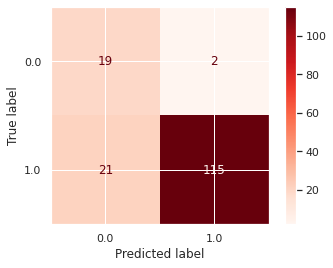

In [ ]:
disp = plot_confusion_matrix(classifier, X_test, y_test, cmap='Reds')

In [ ]:
print("Recall score: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

Recall score: 0.8161764705882353
F1 Score: 0.8951612903225806


## 9.2 NearMiss-3

“NearMiss-3 is a 2-steps algorithm. First, for each negative sample, their M nearest-neighbors will be kept. Then, the positive samples selected are the one for which the average distance to the N nearest-neighbors is the largest.”

In [ ]:
# Under sample the majority class
nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss= nearmiss.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_nearmiss).items()))

[(0.0, 78), (1.0, 78)]


### KNN

Text(0, 0.5, 'Mean Error')

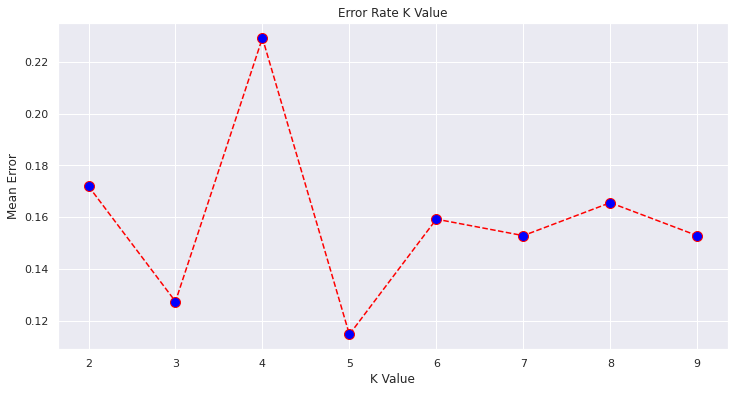

In [ ]:
error = []
# Calculating error for K values between 1 and 10
for i in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_nearmiss, y_train_nearmiss)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(2, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train_nearmiss, y_train_nearmiss)
y_pred= classifier.predict(X_test) 

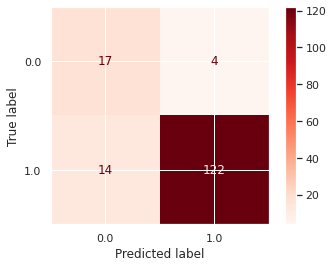

In [ ]:
disp = plot_confusion_matrix(classifier, X_test, y_test, cmap='Reds')

In [ ]:
print("Recall score: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

Recall score: 0.8970588235294118
F1 Score: 0.9312977099236641


### SVM

In [ ]:
# Creating SVM model.
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_nearmiss,y_train_nearmiss)
y_pred = clf.predict(X_test)

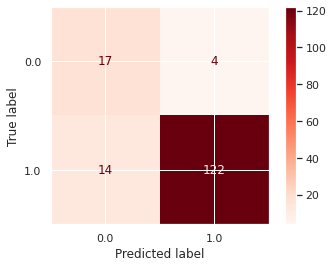

In [ ]:
disp = plot_confusion_matrix(classifier, X_test, y_test, cmap='Reds')

In [ ]:
print("Recall score: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

Recall score: 0.9558823529411765
F1 Score: 0.962962962962963


# Results


##Best scores after oversampling: SMOTE + SVM

f1-score: 0.98

recall: 0.98

##Best scores after undersampling: Nearmiss + SVM

f1-score: 0.96

recall: 0.96


